    age     sex  trestbps   chol                cp  exang  fbs  thalach  \
0  63.0    male     145.0  233.0    typical angina    0.0  1.0    150.0   
1  67.0    male     160.0  286.0      asymptomatic    1.0  0.0    108.0   
2  67.0    male     120.0  229.0      asymptomatic    1.0  0.0    129.0   
3  37.0    male     130.0  250.0  non-anginal pain    0.0  0.0    187.0   
4  41.0  female     130.0  204.0   atypical angina    0.0  0.0    172.0   

  heart_disease  
0       absence  
1      presence  
2      presence  
3       absence  
4       absence  


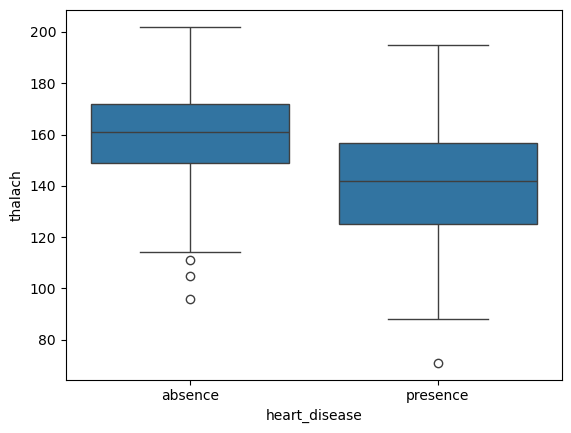

`thalach` mean Difference:  19.11905597473242
`thalach` median Difference:  19.0
p-value for `thalach` two-sample t-test:  3.456964908430172e-14


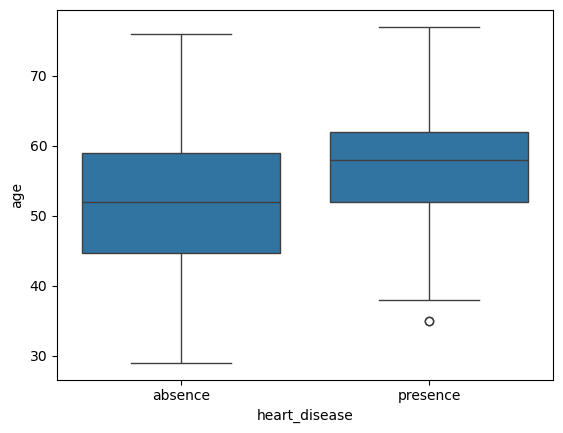

`age` mean Difference:  4.040533426917001
`age` median Difference:  6.0
p-value for `age` two-sample t-test:  8.955636917529706e-05


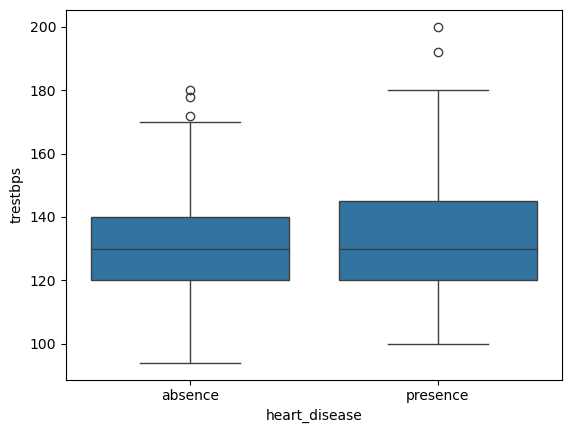

`trestbps` mean Difference:  5.318345323740999
`trestbps` median Difference:  0.0
p-value for `trestbps` two-sample t-test:  0.008548268928594928


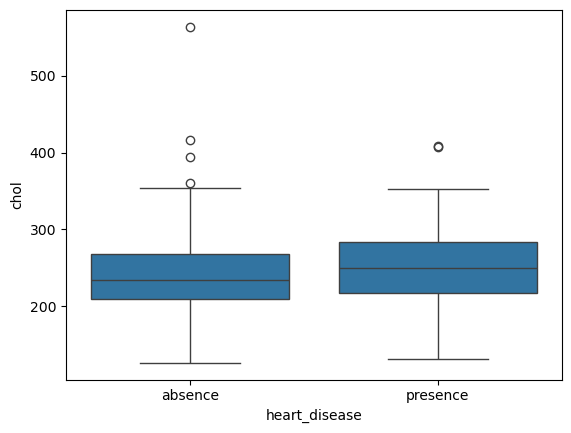

`chol` mean Difference:  8.834576241445887
`chol` median Difference:  14.5
p-value for `chol` two-sample t-test:  0.13914167020436527


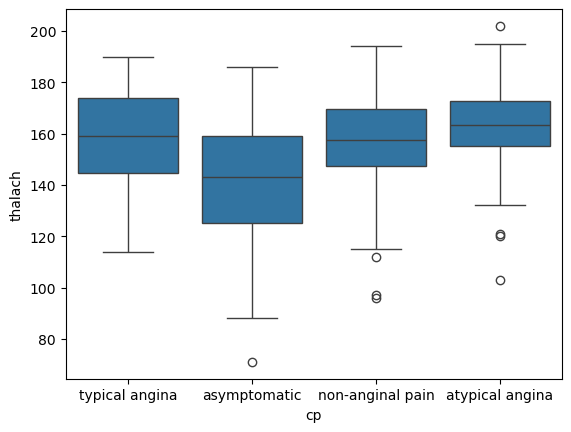

p-value for ANOVA:  1.9065505247705008e-10
           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------------
    asymptomatic  atypical angina  21.7394    0.0  12.7442 30.7347   True
    asymptomatic non-anginal pain  14.7264    0.0   7.2583 22.1945   True
    asymptomatic   typical angina   15.276 0.0081   2.9707 27.5812   True
 atypical angina non-anginal pain   -7.013 0.2481 -16.7587  2.7327  False
 atypical angina   typical angina  -6.4635 0.6213 -20.2702  7.3432  False
non-anginal pain   typical angina   0.5495 0.9995 -12.3145 13.4136  False
-------------------------------------------------------------------------
heart_disease     absence  presence
cp                                 
asymptomatic           39       105
atypical angina        41         9
non-anginal pain       68        18
typical angina         16         7
p

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu, chi2_contingency
import statsmodels.api as sm
import statsmodels.formula.api as smf


# load data
heart = pd.read_csv('heart_disease.csv')

# inspect data
print(heart.head())

# box plot of `thalach` based on heart disease
sns.boxplot(x=heart.heart_disease, y=heart.thalach)
plt.show()

# save `thalach` for hd patients and non-hd patients
thalach_hd = heart.thalach[heart.heart_disease == 'presence']
thalach_no_hd = heart.thalach[heart.heart_disease == 'absence']

# calculate and print mean difference
mean_diff = np.mean(thalach_no_hd) - np.mean(thalach_hd)
print('`thalach` mean Difference: ', mean_diff)

# calculate and print median difference
med_diff = np.median(thalach_no_hd) - np.median(thalach_hd)
print('`thalach` median Difference: ', med_diff)

# run two-sample t-test
from scipy.stats import ttest_ind
tstat, pval = ttest_ind(thalach_hd, thalach_no_hd)
print('p-value for `thalach` two-sample t-test: ', pval)

# investigating other quantitative variables
#age
plt.clf()
sns.boxplot(x=heart.heart_disease, y=heart.age)
plt.show()
age_hd = heart.age[heart.heart_disease == 'presence']
age_no_hd = heart.age[heart.heart_disease == 'absence']
mean_diff = np.mean(age_hd) - np.mean(age_no_hd)
print('`age` mean Difference: ', mean_diff)
med_diff = np.median(age_hd) - np.median(age_no_hd)
print('`age` median Difference: ', med_diff)
tstat, pval = ttest_ind(age_hd, age_no_hd)
print('p-value for `age` two-sample t-test: ', pval)

#trestbps
plt.clf()
sns.boxplot(x=heart.heart_disease, y=heart.trestbps)
plt.show()
trestbps_hd = heart.trestbps[heart.heart_disease == 'presence']
trestbps_no_hd = heart.trestbps[heart.heart_disease == 'absence']
mean_diff = np.mean(trestbps_hd) - np.mean(trestbps_no_hd)
print('`trestbps` mean Difference: ', mean_diff)
med_diff = np.median(trestbps_hd) - np.median(trestbps_no_hd)
print('`trestbps` median Difference: ', med_diff)
tstat, pval = ttest_ind(trestbps_hd, trestbps_no_hd)
print('p-value for `trestbps` two-sample t-test: ', pval)

#chol
plt.clf()
sns.boxplot(x=heart.heart_disease, y=heart.chol)
plt.show()
chol_hd = heart.chol[heart.heart_disease == 'presence']
chol_no_hd = heart.chol[heart.heart_disease == 'absence']
mean_diff = np.mean(chol_hd) - np.mean(chol_no_hd)
print('`chol` mean Difference: ', mean_diff)
med_diff = np.median(chol_hd) - np.median(chol_no_hd)
print('`chol` median Difference: ', med_diff)
tstat, pval = ttest_ind(chol_hd, chol_no_hd)
print('p-value for `chol` two-sample t-test: ', pval)

# box plot of `thalach` based on `cp`
plt.clf()
sns.boxplot(x=heart.cp, y=heart.thalach)
plt.show()

# save `thalach` based on `cp`
thalach_typical = heart.thalach[heart.cp == 'typical angina']
thalach_asymptom = heart.thalach[heart.cp == 'asymptomatic']
thalach_nonangin = heart.thalach[heart.cp == 'non-anginal pain']
thalach_atypical = heart.thalach[heart.cp == 'atypical angina']

# run ANOVA
from scipy.stats import f_oneway
Fstat, pval = f_oneway(thalach_typical, thalach_asymptom, thalach_nonangin, thalach_atypical)
print('p-value for ANOVA: ', pval)

# run Tukey's range test
from statsmodels.stats.multicomp import pairwise_tukeyhsd
output = pairwise_tukeyhsd(heart.thalach, heart.cp)
print(output)

# contingency table of heart disease vs cp
Xtab = pd.crosstab(heart.cp, heart.heart_disease)
print(Xtab)

# run chi-square test
from scipy.stats import chi2_contingency
chi2, pval, dof, exp = chi2_contingency(Xtab)
print('p-value for chi-square test: ', pval)


# Additional Analyses

## 1. Chi-Square Tests for Categorical Variables
categorical_vars = ['sex', 'exang', 'fbs']
for var in categorical_vars:
    table = pd.crosstab(heart[var], heart.heart_disease)
    chi2, pval, _, _ = chi2_contingency(table)
    print(f"p-value for chi-square test ({var} vs heart disease):", pval)

## 2. T-tests & Mann-Whitney U tests for Continuous Variables
continuous_vars = ['trestbps', 'chol']
for var in continuous_vars:
    hd_group = heart[var][heart.heart_disease == 'presence']
    no_hd_group = heart[var][heart.heart_disease == 'absence']
    _, pval_ttest = ttest_ind(hd_group, no_hd_group)
    _, pval_mwu = mannwhitneyu(hd_group, no_hd_group)
    print(f"p-value for T-test ({var} vs heart disease):", pval_ttest)
    print(f"p-value for Mann-Whitney U test ({var} vs heart disease):", pval_mwu)

## 3. Logistic Regression to Identify Key Predictors
heart['heart_disease_binary'] = (heart.heart_disease == 'presence').astype(int)
formula = "heart_disease_binary ~ age + sex + trestbps + chol + thalach + exang + fbs"
logit_model = smf.logit(formula, data=heart).fit()
print(logit_model.summary())
